<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 9. <b>Деревья решений и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Классификация</a></li>
        <li><a href="#2">Регрессия</a></li>
        <li><a href="#3">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подлючение библиотек</b></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Классификация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a>

In [4]:
from sklearn import tree

<p><b>Исходные данные</b></p>

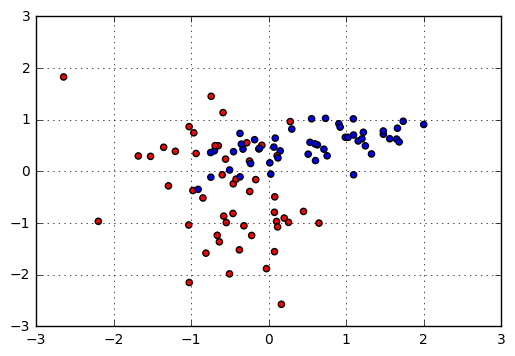

In [5]:
n = 100
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=2, class_sep=0.5,
                           random_state=123)

clrMap = ListedColormap(["blue", "red"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<p><b>Обучение</b></p>

In [7]:
decTree = tree.DecisionTreeClassifier(criterion="entropy")

In [8]:
decTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

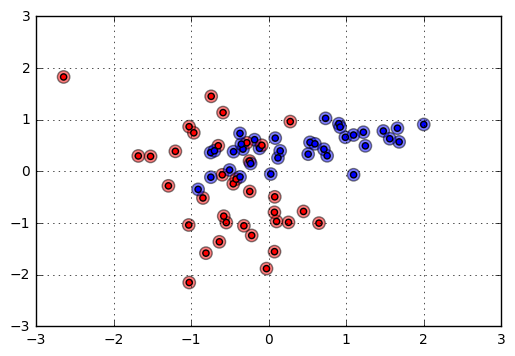

In [9]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [10]:
score = decTree.score(x_test, y_test)
score

0.90000000000000002

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
accuracy_score(y_test, decTree.predict(x_test))

0.90000000000000002

In [13]:
print(classification_report(y_test, decTree.predict(x_test), target_names=["Class 0", "Class 1"]))

             precision    recall  f1-score   support

    Class 0       0.83      1.00      0.91        15
    Class 1       1.00      0.80      0.89        15

avg / total       0.92      0.90      0.90        30



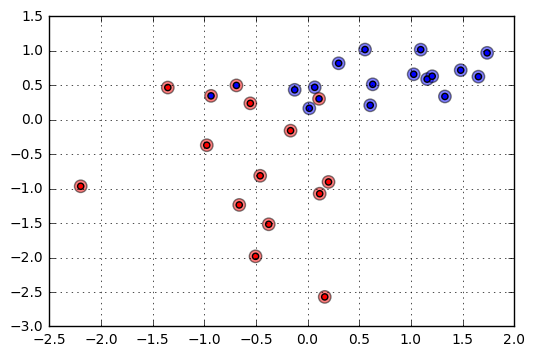

In [14]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=decTree.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

In [15]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))

In [16]:
points = np.c_[xx.ravel(), yy.ravel()]
Z = decTree.predict(points)
Z = Z.reshape(xx.shape)

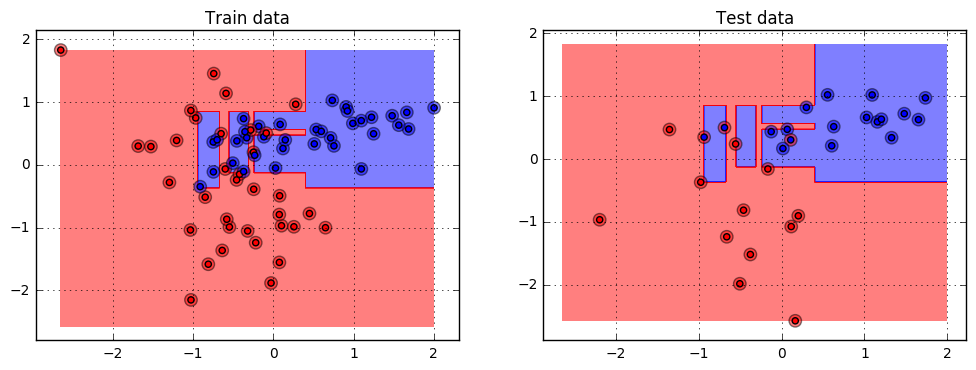

In [17]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<p><b>Структура Tree</b></p>

In [18]:
decTree.tree_

In [19]:
decTree.tree_.children_left

array([ 1, -1,  3,  4, -1,  6,  7, -1,  9, -1, 11, -1, 13, -1, 15, -1, 17,
       -1, 19, -1, -1, -1, -1])

In [20]:
decTree.tree_.children_right

array([ 2, -1, 22,  5, -1, 21,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, -1, -1, -1])

In [21]:
decTree.tree_.threshold

array([-0.36742136, -2.        ,  0.39569354, -0.93668437, -2.        ,
        0.85086745, -0.67341447, -2.        , -0.1267982 , -2.        ,
       -0.54985893, -2.        , -0.30535382, -2.        , -0.23837915,
       -2.        ,  0.47710764, -2.        ,  0.56064689, -2.        ,
       -2.        , -2.        , -2.        ])

In [22]:
decTree.tree_.feature

array([ 1, -2,  0,  0, -2,  1,  0, -2,  1, -2,  0, -2,  0, -2,  0, -2,  1,
       -2,  1, -2, -2, -2, -2])

In [23]:
decTree.tree_.value

array([[[ 35.,  35.]],

       [[  0.,  18.]],

       [[ 35.,  17.]],

       [[ 17.,  17.]],

       [[  0.,   7.]],

       [[ 17.,  10.]],

       [[ 17.,   7.]],

       [[  4.,   0.]],

       [[ 13.,   7.]],

       [[  0.,   2.]],

       [[ 13.,   5.]],

       [[  0.,   2.]],

       [[ 13.,   3.]],

       [[  6.,   0.]],

       [[  7.,   3.]],

       [[  0.,   2.]],

       [[  7.,   1.]],

       [[  5.,   0.]],

       [[  2.,   1.]],

       [[  0.,   1.]],

       [[  2.,   0.]],

       [[  0.,   3.]],

       [[ 18.,   0.]]])

In [24]:
#http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node):
        if (threshold[node] != -2):
            print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features,left[node])
            print("} else {")
            if right[node] != -1:
                recurse (left, right, threshold, features,right[node])
            print("}")
        else:
            print("return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [25]:
get_code(decTree, ["X0", "X1"])

if ( X1 <= -0.367421358824 ) {
return [[  0.  18.]]
} else {
if ( X0 <= 0.395693540573 ) {
if ( X0 <= -0.936684370041 ) {
return [[ 0.  7.]]
} else {
if ( X1 <= 0.850867450237 ) {
if ( X0 <= -0.673414468765 ) {
return [[ 4.  0.]]
} else {
if ( X1 <= -0.126798197627 ) {
return [[ 0.  2.]]
} else {
if ( X0 <= -0.549858927727 ) {
return [[ 0.  2.]]
} else {
if ( X0 <= -0.305353820324 ) {
return [[ 6.  0.]]
} else {
if ( X0 <= -0.238379150629 ) {
return [[ 0.  2.]]
} else {
if ( X1 <= 0.477107644081 ) {
return [[ 5.  0.]]
} else {
if ( X1 <= 0.560646891594 ) {
return [[ 0.  1.]]
} else {
return [[ 2.  0.]]
}
}
}
}
}
}
}
} else {
return [[ 0.  3.]]
}
}
} else {
return [[ 18.   0.]]
}
}


<p><b>Три класса</b></p>

<p><b>Исходные данные</b></p>

In [26]:
n = 100
x, y = make_classification(n_samples=n, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=1,
                           random_state=1234)

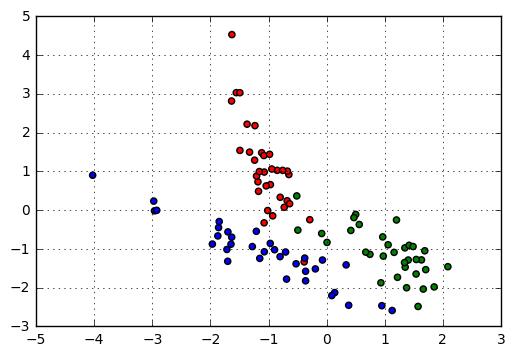

In [27]:
clrMap = ListedColormap(["blue", "red", "green"])
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<p><b>Обучение</b></p>

In [29]:
decTree = tree.DecisionTreeClassifier(criterion="entropy")

In [30]:
decTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

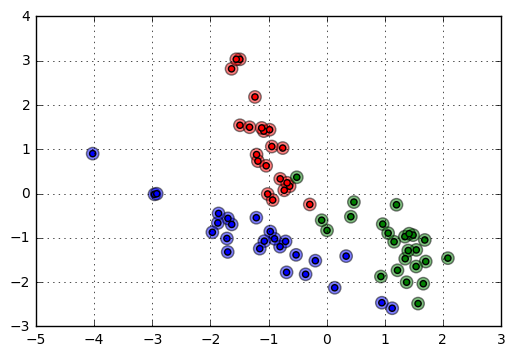

In [31]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [32]:
score = decTree.score(x_test, y_test)
score

0.8666666666666667

In [33]:
print(classification_report(y_test, decTree.predict(x_test), target_names=["Class 0", "Class 1", "Class 2"]))

             precision    recall  f1-score   support

    Class 0       0.78      0.78      0.78         9
    Class 1       0.92      0.92      0.92        12
    Class 2       0.89      0.89      0.89         9

avg / total       0.87      0.87      0.87        30



<p><b>Графики</b></p>

In [34]:
step = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), step), np.arange(x[:,1].min(), x[:,1].max(), step))

In [35]:
points = np.c_[xx.ravel(), yy.ravel()]
#Z = decTree.predict_proba(points)[:, 1]
Z = decTree.predict(points)
Z = Z.reshape(xx.shape)

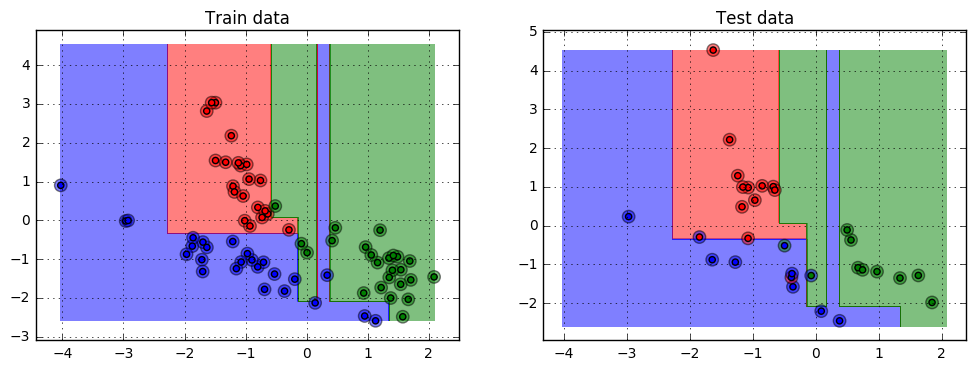

In [36]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=decTree.predict(x_train), s=20, cmap=clrMap)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=clrMap, alpha=.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=80, cmap=clrMap, alpha=0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=decTree.predict(x_test), s=20, cmap=clrMap)
plt.grid(True)

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>

In [37]:
from scipy import stats

<p><b>Исходные данные</b></p>

In [38]:
n = 100
x = stats.uniform.rvs(size=n, loc=4, scale=8)

In [39]:
y = 2 + 0.3*x

In [40]:
mu = 0
sigma = 0.5
y1 = stats.norm.rvs(size=n, loc=mu, scale=sigma) + y

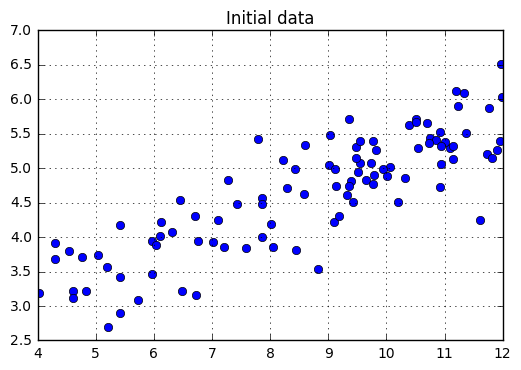

In [41]:
plt.title("Initial data")
plt.plot(x, y1, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.3, random_state=0)

In [43]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

<p><b>Обучение</b></p>

In [44]:
decTreeReg = tree.DecisionTreeRegressor(criterion="mse", random_state=0)

In [45]:
decTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

<p><b>Проверка на тестовом подмножестве</b></p>

In [46]:
decTreeReg.score(x_test, y_test)

0.48127662075621791

<p><b>Графики</b></p>

In [47]:
xx = np.arange(x.min(), x.max(), 0.01)[:, np.newaxis]

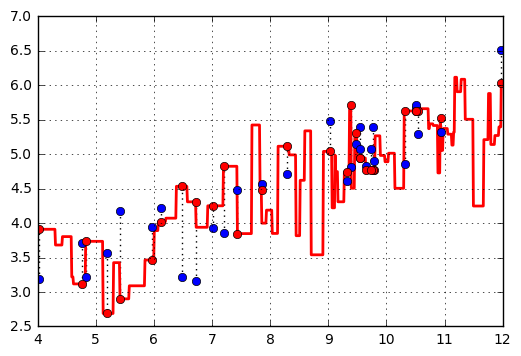

In [48]:
plt.plot(xx, decTreeReg.predict(xx), c="r", label="max_depth=5", linewidth=2)
plt.plot(x_test, y_test, "o")
plt.vlines(x_test, ymin=y_test, ymax=decTreeReg.predict(x_test), colors="black", linestyles="dotted")
plt.plot(x_test, decTreeReg.predict(x_test), "o", color="red", lw=2)
plt.grid()
plt.show()